In [3]:
from session.PPOsession import PPOSession
from agent.train_and_test.train_test_callback import TrainTestCallback

In [4]:
ppos1 = PPOSession('CustomHopper-source-v0', "outputs/ppo-basic", verbose=1)
ppos1.load_agent()
N_episode = 4000
ppos1.load_callback(TrainTestCallback, max_episode=N_episode, test_every=200, test_env_path = 'CustomHopper-target-v0')
ppos1.train(N_episode*500)

Successful creation of the session, first step is step=1.


/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


 199 episodes completed.

/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


 4000 episodes completed.

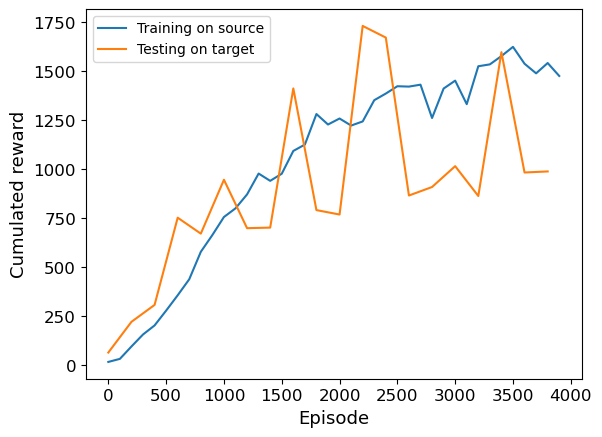

In [15]:
import matplotlib.pyplot as plt
from rolling_avg import rolling_avg
import json
n_avg = 100
fig, ax = plt.subplots(1,1)
dir = "outputs/ppo-basic/step_1_train/"
with open(dir + 'train_rewards.json') as f:
    rewards = json.load(f)
averaged_rewards = rolling_avg(rewards, n_avg)
ax.plot(range(0, len(averaged_rewards)*n_avg, n_avg), averaged_rewards, label="Training on source")
with open(dir + 'test_rewards.json') as f:
    rewards = json.load(f)
ax.plot(range(0, len(averaged_rewards)*n_avg, 200), rewards, label="Testing on target")
ax.set_xlabel("Episode", fontsize=13)
ax.set_ylabel("Cumulated reward", fontsize=13)
ax.set_xlabel("Episode", fontsize=13)
ax.tick_params(axis='both', labelsize=12)
ax.legend()

In [16]:
from adr import ADRCallback
from env import * # To register the ADR env.
from session.PPOsession import PPOSession
ppos2 = PPOSession('ADRHopper-v0', "outputs/ppo-adr")
ppos2.load_agent()
ppos2.load_callback(ADRCallback, ref_env_path = 'CustomHopper-target-v0', nenvs=10)
N_episode = 3500
ppos2.train(N_episode*500)

/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_parameters to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_parameters` for environment variables or `env.get_wrapper_attr('get_parameters')` that will search the reminding wrappers.
  logger.warn(
/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.set_parameters to get variables from other wrappers is deprecated and will be removed in v1.0, to get this v

 1129 episodes completed.

In [ ]:
ppos3 = PPOSession(ADR, "outputs/ppo-adr-pretrained")
ppos3.load_agent("outputs/ppo-basic/model.mdl")
ppos3.load_callback(ADRCallback, ref_env_path = 'CustomHopper-target-v0', nenvs=10)
N_episode = 2000
ppos3.train(N_episode*500)

0